# Plot

### 不具合混入コミットの割合を箱ひげ図にプロットする

\begin{tabular}{lrrrrrrrr}
\toprule
 & count & mean & std & min & 25% & 50% & 75% & max \\
\midrule
0 & 76 & 0.135 & 0.143 & 0.000 & 0.045 & 0.120 & 0.168 & 1.000 \\
0 & 92 & 0.167 & 0.098 & 0.013 & 0.085 & 0.160 & 0.219 & 0.389 \\
\bottomrule
\end{tabular}



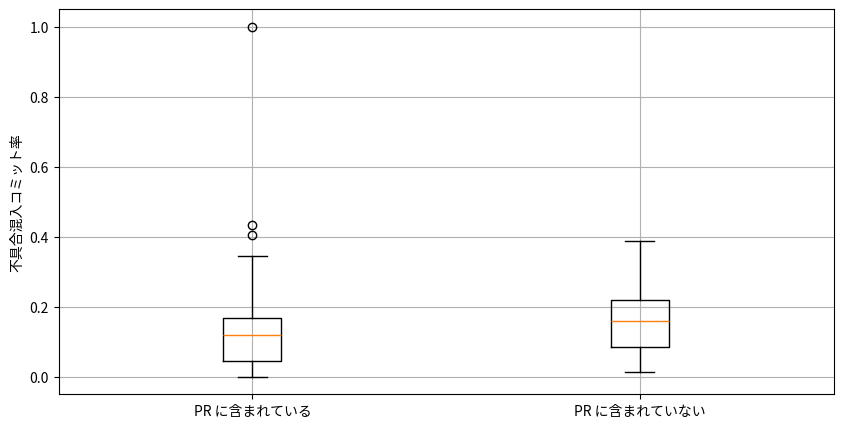

In [1]:
import matplotlib.pyplot as plt
import pandas as pd


def get_stats(series: pd.Series) -> pd.DataFrame:
    return pd.DataFrame(
        [
            {
                "count": series.count(),
                "mean": series.mean(),
                "std": series.std(),
                "min": series.min(),
                "25%": series.quantile(0.25),
                "50%": series.quantile(0.5),
                "75%": series.quantile(0.75),
                "max": series.max(),
            }
        ]
    )


# データの読み込み
df = pd.read_csv("data/pull_request_effect.csv")

df["#cmt+pr"] = df["#cmt+pr+bi"] + df["#cmt+pr-bi"]
df["#cmt-pr"] = df["#cmt-pr+bi"] + df["#cmt-pr-bi"]

# ================================================
# プルリクエスト有りのバグコミット割合を算出
# ================================================

# プルリクエストを使用していないプロジェクトを除外
filtered_df = df[df["#cmt+pr"] > 0]
bug_rate_in_pr = filtered_df["#cmt+pr+bi"] / filtered_df["#cmt+pr"]
# プルリクエスト有りの統計量を算出
result_df = get_stats(bug_rate_in_pr)

# ================================================
# プルリクエスト無しのバグコミット割合を算出
# ================================================
filtered_df = df[df["#cmt-pr"] > 0]
bug_rate_not_in_pr = filtered_df["#cmt-pr+bi"] / filtered_df["#cmt-pr"]
# プルリクエスト無しの統計量を算出
result_df = pd.concat([result_df, get_stats(bug_rate_not_in_pr)], axis=0)

print(result_df.to_latex(float_format="%.3f"))

# ================================================
# プロジェクトごとのバグ割合を箱ひげ図で表示
# ================================================
plt.rc("font", family="Noto Sans CJK JP")
plt.figure(figsize=(10, 5))
plt.boxplot(
    [bug_rate_in_pr, bug_rate_not_in_pr],
    tick_labels=["PR に含まれている", "PR に含まれていない"],
)
plt.ylabel("不具合混入コミット率")
plt.grid()
plt.show()